# Bimodal Gaussian Posterior - NPE_A method

In [39]:
import os
import sys

# Add the parent directory (lfi) to sys.path
sys.path.insert(0, os.path.abspath('..'))
import sbi
import sbi.utils
import sbi.inference
import sbi.diagnostics
import sbi.analysis
import lfi
import torch
import numpy as np

## D=5 (slightly higher dimensionality than toy case)

In [70]:
D = 5
sim = lfi.simulators.BimodalGaussian(sigma_noise=0.1)
prior = lfi.priors.UniformPrior(low=-10, high=10, dim=D)
observation = np.zeros(D)
prior_sbi = prior.sbi_uniform()

### Only final round (Algorithm 2)

In [86]:
npe_a = sbi.inference.NPE_A(prior_sbi, num_components=10)

In [87]:
# Algorithm 2, ie. final_round=True
num_sims = 50_000
theta = prior_sbi.sample((num_sims,))
x = sim.simulate_pytorch(theta)
_ = npe_a.append_simulations(theta, x).train(final_round=True)
posterior = npe_a.build_posterior().set_default_x(observation)

 Neural network successfully converged after 69 epochs.

In [84]:
posterior_samples = posterior.sample((1000,), x=observation)

Drawing 1000 posterior samples:   0%|          | 0/1000 [00:00<?, ?it/s]

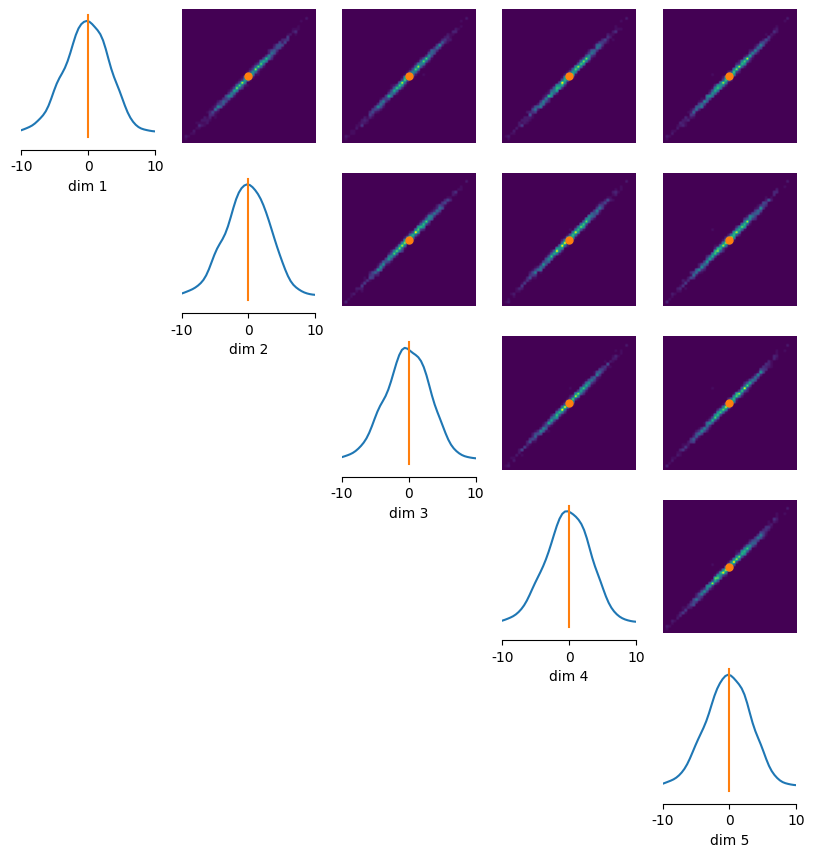

In [85]:
fig, ax = sbi.analysis.pairplot(posterior_samples, limits=torch.tensor([-10, 10.]).repeat(D, 1), points=observation, subset=[i for i in range(D)], diag="kde")